# 1 : Importing packages



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 2: Data Preprocessing





# 2.1 : Load the train and test data


In [4]:
# locating with the actual path to  Excel file
trainfile_path = r'S:\Angewandet_KI_Master\extra\keggel_projects\classification_problems\digit-recognizer\train.csv'
testfile_path = r'S:\Angewandet_KI_Master\extra\keggel_projects\classification_problems\digit-recognizer\test.csv'

#reading the csv 
train = pd.read_csv(trainfile_path)
test = pd.read_csv(testfile_path)

# Display the first few rows of the dataframe
print(train.head(5))
print(test.head(5))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# 2.2 : Normalize the data


In [6]:
X_train = X_train / 255.0
test = test / 255.0

# 2.3:  Reshaping image in 3 dimensions (height = 28px, width = 28px , canal = 1)

In [15]:
#X_train = np.array(X_train.reshape(-1,28,28,1))
#X_test = np.array(test.reshape(-1,28,28,1))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

# 2.4:  Split the train and the validation set for the fitting

In [16]:
# Define random_seed with an integer value for reproducibility
random_seed = 2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [17]:
# naming the classes
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 2.5 : Plotting the training sets with their labels

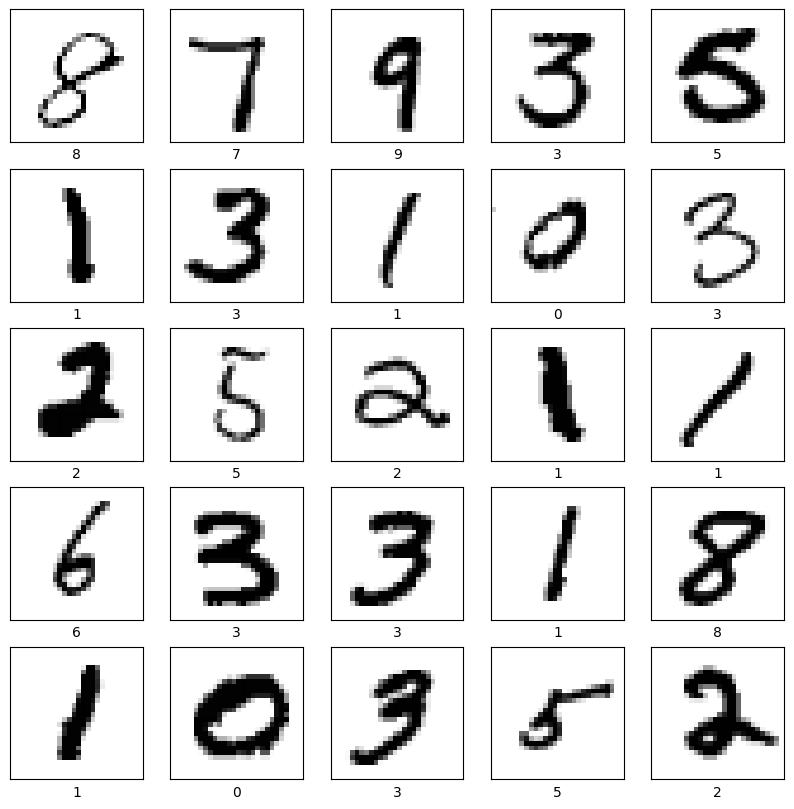

In [18]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train.iloc[i]])
plt.show()

# 3 : Build the model (here sequential model )

In [20]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#  4: Compile the model

In [21]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 5: Train the model

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9924 - val_loss: 0.0270
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9929 - val_loss: 0.0253
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9874 - val_loss: 0.0548
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9848 - val_loss: 0.0599
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9876 - val_loss: 0.0541
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.5869e-04 - val_accuracy: 0.9881 - val_loss: 0.0510
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9994 - loss: 0.002

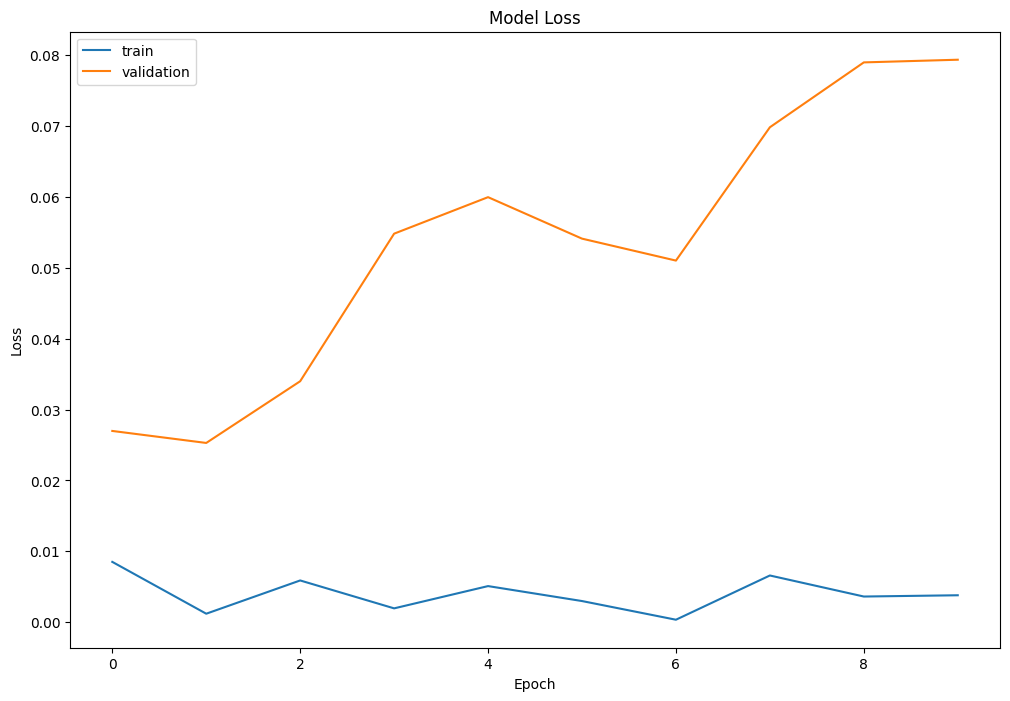

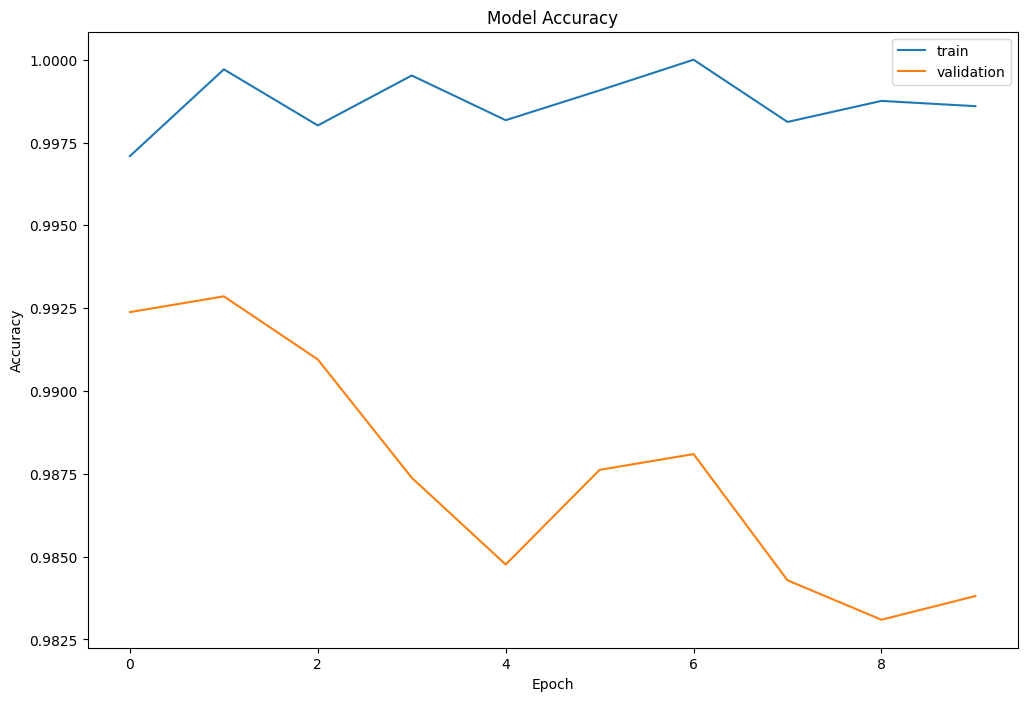

In [40]:
# Train the model on training data and validate on validation data simultaneously
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10
)

# Convert the training history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extract loss and accuracy for training and validation
df_loss = history_df[['loss', 'val_loss']].copy()
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)

df_acc = history_df[['accuracy', 'val_accuracy']].copy()
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)

# Plotting the loss
df_loss.plot(title='Model Loss', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Loss')

# Plotting the accuracy
df_acc.plot(title='Model Accuracy', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Accuracy')

plt.show()


 # 6: Test loss and test accuracy.

In [23]:
 # Test loss and test accurac.
test_loss, test_acc = model.evaluate(X_val,Y_val, verbose=2)

print('\nTest accuracy:', test_acc)

132/132 - 0s - 2ms/step - accuracy: 0.9764 - loss: 0.0874

Test accuracy: 0.9764285683631897


# 7: Predict on other images (non seen )

In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:

# make predictions
predictions = probability_model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [26]:
# show the fourth prediction
predictions[4]


array([5.2702185e-09, 1.9193351e-08, 1.2385956e-04, 9.9952853e-01,
       1.8135892e-15, 1.2097317e-06, 1.0215295e-11, 1.2142265e-10,
       3.4624652e-04, 1.6587688e-07], dtype=float32)

In [27]:
#max from the value is choosed and given as output.
np.argmax(predictions[4])

3

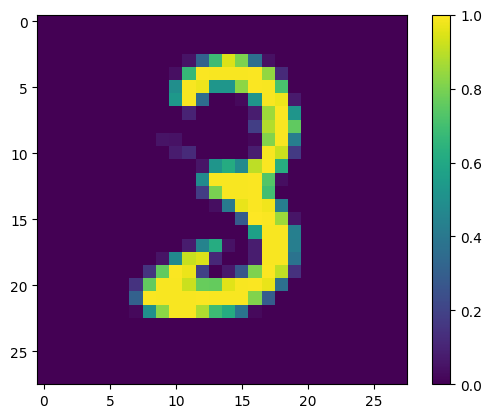

In [28]:
# plot the test image
plt.figure()
plt.imshow(X_test[4])
plt.colorbar()
plt.grid(False)
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step


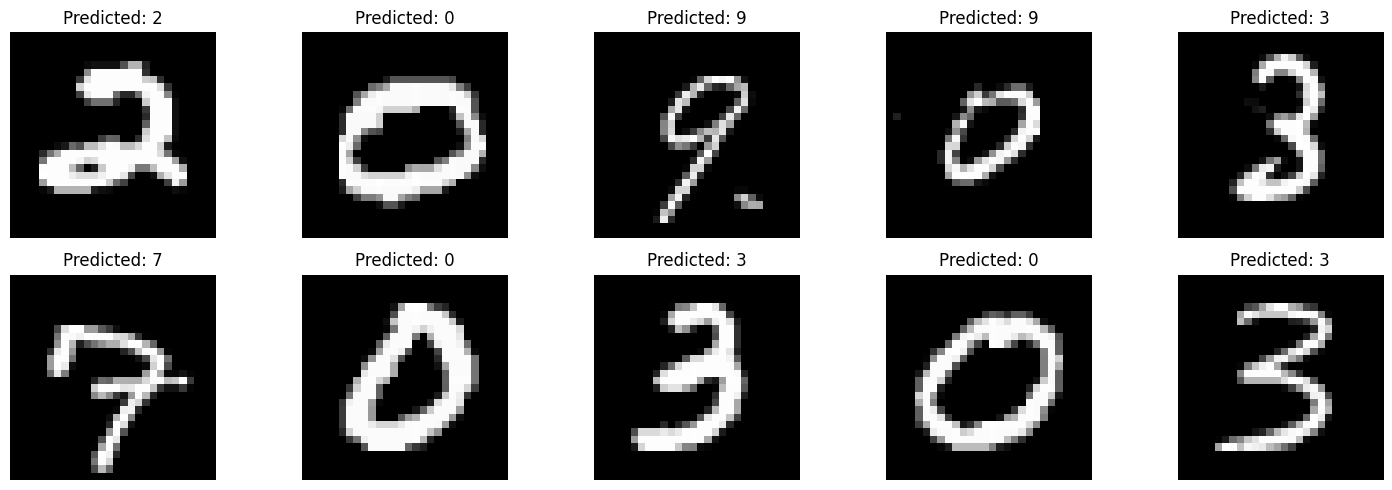

''

In [42]:

# Make predictions on the test set and display the first 10 images
predictions = model.predict(test)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Number of images to display
num_samples = 10
plt.figure(figsize=(15, 5))

for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
''